#Imports

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

#Classes(Implementation)

##DFS to check cyclicity

In [7]:
class DFS_Cyclicity: 

  def __init__(self):

    '''
    This class will be used in Naive Kruskal algorithm where we need to check cyclicity.
    It uses DFS algorithm to label each edge, and then by computing ancestors, it checks
    whether a graph is cyclic or not.

    IMPORTANT NOTE: This class should also take this fact into account that the input graph
    might not be connected. Hence, it should go through all connected parts of the graph and
    check whether there is a cycle in that part. One would say that all input graphs are connected
    and MST is also connected, but we do not need to check cyclicity on the original graph or on 
    the final version of MST. Instead, we need to check it on the current non-completed version of
    MST, which might be not connected. For example, after some iterations, we might obtain a non-complete
    MST including following edges:
    Edges = [1, 2], [1, 3], [4, 5], [4, 6], [5, 6]
    This set of edges constructs a not connected graph and we still need to check cyclicity on this set.
    This class will check cyclicity over the all connected parts of a graph.
    '''

    self.G = []

  def graphInit(self, edgeList):

    '''
    self.visit:

    Since, selecting edges in Naive Kruskal algorithm is according to the weights (selects the minimum-weighted
    edge that does not create cycle) and not according to the order of vertices, the non-completed MST might
    consist of this set of edges:
    Edges = [19, 20], [11, 13], [20, 21], [31, 32]
    As it is obvious, the number associated with vertices does not necessarily start from 1 and does not go in order.
    So, python lists are not a good choice to track whether a NODE has already been VISITED. Instead, we are better to
    use python dictionaries whose keys are edges.
    In order to construct such a dictionary, we need to have the unique set of vertices which are the keys. That is why 
    in this function we define a attribute named self.uniqueVertices and use it when defining self.visit.
    '''

    self.G = edgeList
    self.uniqueVertices = []
    list(map(lambda x: list(map(lambda y: self.uniqueVertices.append(y), x)), self.G))

    # L_E.label
    self.label = {f"{edgeList[i][0]},{edgeList[i][1]}": None for i in range(len(self.G))}
    # L_E.ancestor
    self.ancestor = {f"{edgeList[i][0]},{edgeList[i][1]}": None for i in range(len(self.G))}
    # L_V.ID
    self.visit = {i : False for i in list(set(self.uniqueVertices))}

  def __cycleCheckingOnConnectedGraph(self, sourceNode):

    '''
    This function will label edges in a CONNECTED part of a graph as 
    DISCOVERY or BACK edge.
    '''

    self.visit[sourceNode] = True # L_V[v].ID <- 1

    for Ed in self.G: # forall e E G.incidentEdges(v) do

      if Ed[0] == sourceNode or Ed[1] == sourceNode: # graph is undirected

        if self.label[f"{Ed[0]},{Ed[1]}"] == None: # if(L_E[e].label) = null then

          w = Ed[1] if Ed[0] == sourceNode else Ed[0] # w <- G.opposite(v, e) -> It returns the pair of source node. 
          #If the source node is Ed[0], it returns Ed[1] and if the source node is Ed[1], it returns Ed[0].

          if not self.visit[w]: # if(L_V[w].ID = 0) then

            self.label[f"{Ed[0]},{Ed[1]}"] = "DISCOVERY" # L_E[e].label <- DISCOVERY
            self.__cycleCheckingOnConnectedGraph(w) # DFS(G, w)

          else:

            self.label[f"{Ed[0]},{Ed[1]}"] = "BACK" # L_E[e].label <- BACK
            self.ancestor[f"{Ed[0]},{Ed[1]}"] = w

    self.backEdges = [i for i in self.label.keys() if self.label[i] == "BACK"]

  def cycleChecking(self):

    '''
    As far as we have edges in the graph labeled as None, our graph is not
    fully visited and there is(are) (an)other connected part(s) to visit. That
    is why the below while loop will terminate if there is no None-labeled edge.
    This function visits and labels all of graph's edges, even if the graph is not
    connected.
    '''

    while None in self.label.values():

      # Find a node whose value is None and run the cycleCheckingOnConnectedGraph function
      # on this node. (source node)

      sN = int(list(self.label.keys())[list(self.label.values()).index(None)].split(",")[0])

      self.__cycleCheckingOnConnectedGraph(sN)
    
    # Once you labeled all edges, iterate on all edges. As soon as an edge e=(v,w) labelled
    #  as BACK and with L_E[e].ancestor = w is found, return "cyclic". Otherwise, "acyclic".

    for BcEd in self.backEdges:

      if self.ancestor[BcEd] == int(BcEd.split(',')[0]) or self.ancestor[BcEd] == int(BcEd.split(',')[-1]): # graph is undirected

        return "cyclic"

    return "acyclic"

##Algorithms

In [41]:
class Graph_Algorithms(DFS_Cyclicity): # DFS_Cyclicity Will be used in Naive-Kruskal

  def __init__(self, numberOfVertices):

    '''
      numberOfVertices : |Vertices|
      self.parent_prim -> PRIM : (child, parent) pairs, initially defined as (child, None) pairs
      self.keys -> PRIM : (node, weight) pairs whose weights are initially set to +inf
      self.parent -> KruskalUF : (child, parent) pairs, initially defined as (child, child) pairs
      self.size -> KruskalUF : (subtree, size) pairs whose sizes are initially set to 1
    '''

    self.V = numberOfVertices
    self.graph = []
    self.parent_prim = {i : None for i in range(1, self.V + 1)} # Will be used in PRIM
    self.keys = {i : float("inf") for i in range(1, self.V + 1)} # Will be used in PRIM
    self.parent = {i : i for i in range(1, self.V + 1)} # Will be used in KruskalUF
    self.size = {i : 1 for i in range(1, self.V + 1)} # Will be used in KruskalUF

  def graphConstruction(self, edgeList):

    '''
      self.graph : Set of edges, each edge representing as [u, v, w]
      u, v : Adjacent nodes -> (u, v) is incident on u, v
      w : Edge weight
    '''

    self.graph = edgeList

  def __extractMin(self, query): # Will be used in PRIM

        min_u = min(query, key=self.keys.get)
        query.remove(min_u)

        return min_u

  def __find_adjacent(self, u): # Will be used in PRIM

        adjacents = set()
        edges_of_graph = list(map(lambda x : x[:2] , self.graph))

        for edge in edges_of_graph:

              if edge[0] == u:
                    adjacents.add(edge[1])

              elif edge[1] == u:
                    adjacents.add(edge[0])

        return adjacents

  def __findParent(self, child): # Will be used in KruskalUF

    '''
      child: A node whose parent is supposed to get discoverd

      __findParent(child): Is a recurssive function that returns
      the rootNode of a subtree containing child
    '''

    if self.parent[child] == child:

      return child

    return self.__findParent(self.parent[child])

  def __Union(self, x, y): # Will be used in KruskalUF

    '''
      x, y : Nodes whose associated subtrees will be merged together

      __Union(x, y): Each time this function is called, it checks whether Find(x) and
      Find(y) is equal. If so, it does nothing. Otherwise, it checks if the size of
      subtree containing x is greater or equal than the size of subtree containing y.
      If so, it merges the second subtree with the first one. Otherwise, it merges the
      first subtree with the second one. 
    '''

    rootX = self.__findParent(x)
    rootY = self.__findParent(y)

    if rootX == rootY:

      pass

    elif self.size[rootX] >= self.size[rootY]:

      self.parent[rootY] = rootX
      self.size[rootX] += self.size[rootY]

    else:

      self.parent[rootX] = rootY
      self.size[rootY] += self.size[rootX]


  def PRIM(self, start, verbose=False):
    
    query = [i for i in range(1, self.V + 1)] # Q <- V
    self.keys[start] = 0

    while len(query) != 0: 

      u = self.__extractMin(query)
      adjacents = self.__find_adjacent(u)

      for v in adjacents:

        key = 0
        key_list1 = list(filter((lambda x : x[:2] == [u, v]), self.graph))
        key_list2 = list(filter((lambda x : x[:2] == [v, u]), self.graph))

        if key_list1 != []:

          key = key_list1[0][-1]
        else:

          key = key_list2[0][-1]
                    
        if v in query and key < self.keys[v]:
          self.keys[v] = key
          self.parent_prim[v] = u
        
    values = self.keys.values()
    totalWeight = sum(values)

    if verbose:

      print(f"MST found by PRIM algorithm: {totalWeight}")

    return totalWeight
        
  def NaiveKruskal(self, verbose=False):

    '''
      This method is using DFS_Cyclicity to check if a graph is ascyclic.
    ''' 

    A = []
    A_withWeights = []

    totalWeight = 0
    # sort edges of G by weight
    self.graph = sorted(self.graph, key=lambda item: item[2]) 

    s = self.graph[0][0]
    
    for (u, v, w) in self.graph: # foreach edge e, in nondecreasing order of weight do

      copy = A.copy()
      copy.append([u, v])

      super().__init__()
      self.graphInit(copy)

      if self.cycleChecking() == "acyclic":# if A U {e} is acyclic then

        A.append([u, v]) # A = A U {e}
        A_withWeights.append([u, v, w])

    for (u, v, w) in A_withWeights:

      totalWeight += w

    if verbose:

      print(f"MST found by Naive-Kruskal algorithm: {totalWeight}")

    return totalWeight

  def KruskalUF(self, verbose=False):

    A = []

    totalWeight = 0

    self.graph = sorted(self.graph, key=lambda item: item[2])

    for (u, v, w) in self.graph:

      if self.__findParent(u) != self.__findParent(v):

        A.append([u, v, w])

        self.__Union(u, v)

    for (u, v, w) in A:

      totalWeight += w

    if verbose:
      
      print(f"MST found by Kruskal-UF algorithm: {totalWeight}")

    return totalWeight

#Weight of the minimum spanning tree for each problem instance

In [ ]:
!unzip /content/mst_dataset.zip

In [ ]:
root = "/content/mst_dataset/"
inputs = []
for file_name in sorted(os.listdir(root)):
  input = []
  with open(root + file_name) as f:
    for i, content in enumerate(f.readlines()):
      input.append(list(map(lambda x: int(x), content.replace("\n", "").split(" "))))
    f.close()
    inputs.append(input)

In [43]:
MST_weights = []
for i, data in enumerate(inputs):

    number_of_nodes = data[0][0]
    number_of_edges = data[0][1]
    graph = data[1:]

    g = Graph_Algorithms(number_of_nodes)
    g.graphConstruction(graph)
    MST_weights.append(g.KruskalUF())

In [48]:
MST_weights_df = pd.DataFrame(None)

MST_weights_df['Problem_instance'] = sorted(os.listdir(root))
MST_weights_df['MST_weight'] = MST_weights
MST_weights_df.index = [i for i in range(1, 69)]

MST_weights_df

,Problem_instance,MST_weight
1,input_random_01_10.txt,29316
2,input_random_02_10.txt,16940
3,input_random_03_10.txt,-44448
4,input_random_04_10.txt,25217
5,input_random_05_20.txt,-32021
...,...,...
64,input_random_64_80000.txt,-180793224
65,input_random_65_100000.txt,-230698391
66,input_random_66_100000.txt,-230168572
67,input_random_67_100000.txt,-231393935


#Correctness

##Compare algorithms' output

In [59]:
for i, data in enumerate(inputs):

  if i < 30:

    number_of_nodes = data[0][0]
    number_of_edges = data[0][1]
    graph = data[1:]
    start = graph[0][0]

    print("-"*50)
    print(f'DATASET N.{str(i)} -> n={number_of_nodes}, m={number_of_edges}')

    g = Graph_Algorithms(number_of_nodes)
    g.graphConstruction(graph)

    g.PRIM(start, verbose=True)
    g.NaiveKruskal(verbose=True)
    g.KruskalUF(verbose=True)

--------------------------------------------------
DATASET N.0 -> n=10, m=9
MST found by PRIM algorithm: 29316
MST found by Naive-Kruskal algorithm: 29316
MST found by Kruskal-UF algorithm: 29316
--------------------------------------------------
DATASET N.1 -> n=10, m=11
MST found by PRIM algorithm: 16940
MST found by Naive-Kruskal algorithm: 16940
MST found by Kruskal-UF algorithm: 16940
--------------------------------------------------
DATASET N.2 -> n=10, m=13
MST found by PRIM algorithm: -44448
MST found by Naive-Kruskal algorithm: -44448
MST found by Kruskal-UF algorithm: -44448
--------------------------------------------------
DATASET N.3 -> n=10, m=10
MST found by PRIM algorithm: 25217
MST found by Naive-Kruskal algorithm: 25217
MST found by Kruskal-UF algorithm: 25217
--------------------------------------------------
DATASET N.4 -> n=20, m=24
MST found by PRIM algorithm: -32021
MST found by Naive-Kruskal algorithm: -32021
MST found by Kruskal-UF algorithm: -32021
----------

##Test on 2 randomly chosen test case from the Github link

In [63]:
#TEST CASE 1
input = []
with open("/content/GITHUB_TEST_CASE.txt") as f:
  for i, content in enumerate(f.readlines()):
    if i == 0:
      n, m = list(map(lambda x: int(x), content.replace("\n", "").split(" ")))
    else:
      input.append(list(map(lambda x: int(x), content.replace("\n", "").split(" "))))

start = input[0][0]

print(f'A random test case from Github link -> n={n}, m={m}\n')
print('The true MST has a weight of: -1837558') # according to Github
g = Graph_Algorithms(n)
g.graphConstruction(input)

_ = g.PRIM(start, verbose=True)
_ = g.NaiveKruskal(verbose=True)
_ = g.KruskalUF(verbose=True)

A random test case from Github link -> n=800, m=1062

The true MST has a weight of: -1837558
MST found by PRIM algorithm: -1837558
MST found by Naive-Kruskal algorithm: -1837558
MST found by Kruskal-UF algorithm: -1837558


In [65]:
#TEST CASE 2
input = []
with open("/content/GITHUB_TEST_CASE2.txt") as f:
  for i, content in enumerate(f.readlines()):
    if i == 0:
      n, m = list(map(lambda x: int(x), content.replace("\n", "").split(" ")))
    else:
      input.append(list(map(lambda x: int(x), content.replace("\n", "").split(" "))))

start = input[0][0]

print(f'A random test case from Github link -> n={n}, m={m}\n')
print('The true MST has a weight of: -513349') # according to Github
g = Graph_Algorithms(n)
g.graphConstruction(input)

_ = g.PRIM(start, verbose=True)
_ = g.NaiveKruskal(verbose=True)
_ = g.KruskalUF(verbose=True)

A random test case from Github link -> n=200, m=262

The true MST has a weight of: -513349
MST found by PRIM algorithm: -513349
MST found by Naive-Kruskal algorithm: -513349
MST found by Kruskal-UF algorithm: -513349


#Complexity

##The fastest algorithm -> KruskalUF: [O(mlogn), constant=0.433]

In [83]:
numberOfRunningPerInput = 30 # execution time of 30 calls is better than a single call
KUF_avg_time = []
N_M = []

for i, data in enumerate(inputs):

  number_of_nodes = data[0][0]
  number_of_edges = data[0][1]
  graph = data[1:]
  KUF_time = []

  N_M.append([number_of_nodes, number_of_edges])

  for _ in range(numberOfRunningPerInput):

    g = Graph_Algorithms(number_of_nodes)
    g.graphConstruction(graph)

    start_time = time.time()
    _ = g.KruskalUF()
    end_time = time.time()
    duration = end_time - start_time
    KUF_time.append(duration)

  KUF_avg_time.append(np.mean(KUF_time)) # Average of these 30 calls

In [128]:
x = list(map(lambda x: int(x[1] * np.log(x[0])),N_M)) # compute mlogn for each problem instance
KUF_avg_time_adj = list(map(lambda x: 1e6 * x, KUF_avg_time)) # Running time is sometime so small that
# the code treat it as zero. To avoid this, we multiply the running time to 1e6. This product does not
# affect the analysis. (Micro sencond)

sizeVStime = {x[i]:KUF_avg_time_adj[i] for i in range(len(x))}
sizeVStime_sorted = sorted(sizeVStime.items(), key=lambda x: x[0])

size = list(map(lambda x: x[0], sizeVStime_sorted))
runningTime = list(map(lambda x: x[1], sizeVStime_sorted))

In [129]:
c_estimates = [round(runningTime[i]/size[i],3) for i in range(len(size))]
print("mlogn\tTime(Micro s)\tConstant")
print(40*"-")
for i in range(len(size)):
  print(f"{size[i]}\t{runningTime[i]:.2f}\t\t{c_estimates[i]}")
print(40*"-")

mlogn	Time(Micro s)	Constant
----------------------------------------
20	33.67		1.684
23	36.94		1.606
25	40.70		1.628
29	40.18		1.386
71	86.52		1.219
77	100.44		1.304
83	99.19		1.195
184	194.74		1.058
191	204.35		1.07
206	206.56		1.003
433	409.86		0.947
455	377.16		0.829
473	412.41		0.872
499	391.04		0.784
594	267.74		0.451
607	274.82		0.453
626	275.08		0.439
630	282.82		0.449
1414	550.26		0.389
1425	556.59		0.391
3103	1387.91		0.447
3151	1266.84		0.402
3223	1244.41		0.386
3235	1312.25		0.406
7012	2869.96		0.409
7072	2743.64		0.388
7105	2732.47		0.385
7192	3169.66		0.441
8980	3316.66		0.369
9069	3510.86		0.387
9173	3470.07		0.378
9284	3546.50		0.382
20157	7497.11		0.372
20172	7634.98		0.378
20347	7293.58		0.358
20514	7781.71		0.379
44082	15892.43		0.361
44290	16563.30		0.374
44456	16212.11		0.365
44522	16289.09		0.366
95821	35721.18		0.373
95893	35976.98		0.375
96207	35262.15		0.367
96675	59316.36		0.614
122377	47666.42		0.39
122506	47254.60		0.386
122598	47437.30		0.387
122865	46239.7

If we use the value $constant = 0.433$ for the constant we can compare the actual execution times with the expected asymptotic growth and visually verify the correspondence:

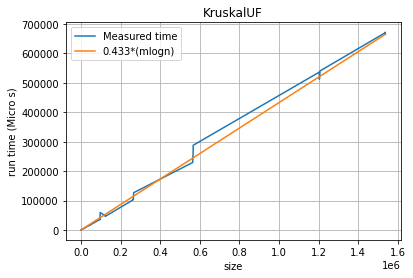

In [130]:
constant = 0.433
ref = [constant*s for s in size]

plt.title("KruskalUF")
plt.plot(size, runningTime)
plt.plot(size, ref)
plt.legend(["Measured time", f"{constant}*(mlogn)"])
plt.ylabel('run time (Micro s)')
plt.xlabel('size')
plt.grid()
plt.savefig('KruskalUF_complexity.png')
plt.show()

##The second fastest algorithm -> PRIM(Heap): [O(mlogn), constant=453]

In [88]:
numberOfRunningPerInput = 10 # execution time of 10 calls is better than a single call
PRIM_avg_time = []
N_M = []

for i, data in enumerate(inputs):

  if i < 40:

    number_of_nodes = data[0][0]
    number_of_edges = data[0][1]
    graph = data[1:]
    start = graph[0][0]
    PRIM_time = []

    N_M.append([number_of_nodes, number_of_edges])

    for _ in range(numberOfRunningPerInput):

      g = Graph_Algorithms(number_of_nodes)
      g.graphConstruction(graph)

      start_time = time.time()
      _ = g.PRIM(start)
      end_time = time.time()
      duration = end_time - start_time
      PRIM_time.append(duration)

    PRIM_avg_time.append(np.mean(PRIM_time)) # Average of these 10 calls

In [101]:
x = list(map(lambda x: int(x[1] * np.log(x[0])),N_M)) # Compute mlogn for each problem instance
PRIM_avg_time_adj = list(map(lambda x: 1e6 * x, PRIM_avg_time)) # Running time is sometime so small that
# the code treat it as zero. To avoid this, we multiply the running time to 1e6. This product does not
# affect the analysis. (Micro sencond)

sizeVStime = {x[i]:PRIM_avg_time_adj[i] for i in range(len(x))}
sizeVStime_sorted = sorted(sizeVStime.items(), key=lambda x: x[0])

size = list(map(lambda x: x[0], sizeVStime_sorted))
runningTime = list(map(lambda x: x[1], sizeVStime_sorted))

In [121]:
c_estimates = [round(runningTime[i]/size[i],3) for i in range(len(size))]
print("mlogn\tTime(Micro s)\tConstant")
print(40*"-")
for i in range(len(size)):
  print(f"{size[i]}\t{runningTime[i]:.2f}\t\t{c_estimates[i]}")
print(40*"-")

mlogn	Time(Micro s)	Constant
----------------------------------------
20	453.92		22.696
23	321.09		13.961
25	369.80		14.792
29	516.49		17.81
71	1489.72		20.982
77	1742.36		22.628
83	1849.74		22.286
184	5840.65		31.743
191	6099.82		31.936
206	6862.76		33.314
433	22642.69		52.293
455	23482.25		51.609
473	25604.58		54.132
499	29377.23		58.872
594	36706.01		61.795
607	38409.40		63.277
626	41815.60		66.798
630	40167.39		63.758
1414	153094.61		108.271
1425	161254.23		113.161
3103	578824.83		186.537
3151	600935.63		190.713
3223	725812.37		225.198
3235	623660.33		192.785
7012	2526312.33		360.284
7072	2572445.38		363.751
7105	2478342.20		348.817
7192	2527132.62		351.381
8980	2975610.39		331.36
9069	3163594.70		348.836
9173	3326344.62		362.623
9284	3247767.56		349.824
20157	9212631.01		457.044
20172	9396702.72		465.829
20347	9248112.37		454.52
20514	9295963.79		453.152
----------------------------------------


If we use the value $constant = 453$ for the constant we can compare the actual execution times with the expected asymptotic growth and visually verify the correspondence:

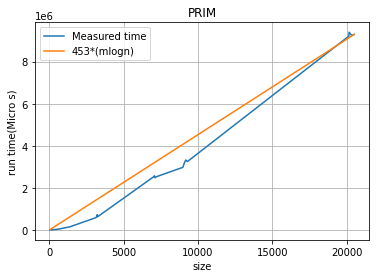

In [120]:
constant = 453
ref = [constant*s for s in size]

plt.title("PRIM")
plt.plot(size, runningTime)
plt.plot(size, ref)
plt.legend(["Measured time", f"{constant}*(mlogn)"])
plt.ylabel('run time(Micro s)')
plt.xlabel('size')
plt.grid()
plt.savefig('PRIM_complexity.png')
plt.show()

##The slowest algorithm -> NaiveKruskal: [O(mn), constant=96]

In [93]:
numberOfRunningPerInput = 4 # execution time of 4 calls is better than a single call
NVK_avg_time = []
N_M = []

for i, data in enumerate(inputs):

  if i < 30:

    number_of_nodes = data[0][0]
    number_of_edges = data[0][1]
    graph = data[1:]
    NVK_time = []

    N_M.append([number_of_nodes, number_of_edges])

    for _ in range(numberOfRunningPerInput):

      g = Graph_Algorithms(number_of_nodes)
      g.graphConstruction(graph)

      start_time = time.time()
      _ = g.NaiveKruskal()
      end_time = time.time()
      duration = end_time - start_time
      NVK_time.append(duration)

    NVK_avg_time.append(np.mean(NVK_time)) # Average of these 4 calls

In [141]:
x = list(map(lambda x: int(x[1] * x[0]), N_M)) # Compute mn for each problem instance
NVK_avg_time_adj = list(map(lambda x: 1e6 * x, NVK_avg_time)) # Running time is sometime so small that
# the code treat it as zero. To avoid this, we multiply the running time to 1e6. This product does not
# affect the analysis. (Micro sencond)

sizeVStime = {x[i]:NVK_avg_time_adj[i] for i in range(len(x))}
sizeVStime_sorted = sorted(sizeVStime.items(), key=lambda x: x[0])

size = list(map(lambda x: x[0], sizeVStime_sorted))
runningTime = list(map(lambda x: x[1], sizeVStime_sorted))

In [142]:
c_estimates = [round(runningTime[i]/size[i],3) for i in range(len(size))]
print("mn\tTime(Micro s)\tConstant")
print(40*"-")
for i in range(len(size)):
  print(f"{size[i]}\t{runningTime[i]:.2f}\t\t{c_estimates[i]}")
print(40*"-")

mn	Time(Micro s)	Constant
----------------------------------------
90	616.91		6.855
100	447.75		4.478
110	555.22		5.047
130	647.01		4.977
480	2399.03		4.998
520	3001.33		5.772
560	3361.34		6.002
2000	16146.36		8.073
2080	16388.12		7.879
2240	19761.20		8.822
7920	84933.52		10.724
8320	103326.20		12.419
8640	104145.23		12.054
9120	114874.48		12.596
12900	180123.21		13.963
13200	185048.28		14.019
13600	201407.85		14.809
13700	211294.83		15.423
53400	1385171.35		25.94
53800	1528045.18		28.402
207200	10051827.43		48.513
210400	9965286.14		47.364
215200	10827776.91		50.315
216000	11417727.89		52.86
846400	81688759.45		96.513
850400	81067453.62		95.329
----------------------------------------


If we use the value $constant = 96$ for the constant we can compare the actual execution times with the expected asymptotic growth and visually verify the correspondence:

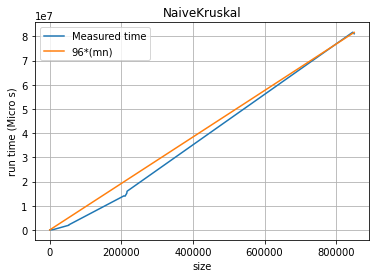

In [149]:
constant = 96
ref = [constant*s for s in size]

plt.title("NaiveKruskal")
plt.plot(size, runningTime)
plt.plot(size, ref)
plt.legend(["Measured time", f"{constant}*(mn)"])
plt.ylabel('run time (Micro s)')
plt.xlabel('size')
plt.grid()
plt.savefig("NaiveKruskal_complexity.png")
plt.show()